# Lab 2 - Ryan Perez

### 0. Import data and declare package dependencies

In [1]:
import pandas as pd
import numpy as np
import openpyxl

avocados = pd.read_excel(r'C:\Users\ryanc\Desktop\GSB_544\Data\avocados\avocados.xlsx')
avocados.head()

date  average_price  total_volume       4046       4225      4770  \
0 2015-01-04           1.22      40873.28    2819.50   28287.42     49.90   
1 2015-01-04           1.79       1373.95      57.42     153.88      0.00   
2 2015-01-04           1.00     435021.49  364302.39   23821.16     82.15   
3 2015-01-04           1.76       3846.69    1500.15     938.35      0.00   
4 2015-01-04           1.08     788025.06   53987.31  552906.04  39995.03   

   total_bags  small_bags  large_bags  xlarge_bags          type  year  \
0     9716.46     9186.93      529.53          0.0  conventional  2015   
1     1162.65     1162.65        0.00          0.0       organic  2015   
2    46815.79    16707.15    30108.64          0.0  conventional  2015   
3     1408.19     1071.35      336.84          0.0       organic  2015   
4   141136.68   137146.07     3990.61          0.0  conventional  2015   

              geography  
0                Albany  
1                Albany  
2               Atlanta  
3               Atlanta  
4  Baltimore/Washington

### 1. Briefly describe the dataset. What information does it contain?
The dataset seems to be logging average prices on various dates for different types/sizes of avocados, along with the volume of sales of avocados. This includes the volume of sales for different size bags, as well as where the avocados came from with regards to region.

### 2. Clean the data in any way you see fit.

In [2]:
#I first want to see all unique values for geography, in order to determine how to potentially organize the info
print(pd.unique(avocados['geography']))

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago'
 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit'
 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield'
 'Houston' 'Indianapolis' 'Jacksonville' 'Las Vegas' 'Los Angeles'
 'Louisville' 'Miami/Ft. Lauderdale' 'Midsouth' 'Nashville'
 'New Orleans/Mobile' 'New York' 'Northeast' 'Northern New England'
 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh' 'Plains'
 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'South Central'
 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa' 'Total U.S.' 'West'
 'West Tex/New Mexico']


In [3]:
#Now break the values up into lists that correspond with the correct sub category

#City list
city = [
    'Albany', 'Atlanta', 'Boise', 'Boston',
    'Charlotte', 'Chicago', 'Columbus',
    'Denver', 'Detroit', 'Grand Rapids', 'Houston', 'Indianapolis',
    'Jacksonville', 'Las Vegas', 'Los Angeles', 'Louisville',
    'Nashville', 'New York', 'Orlando', 'Philadelphia', 'Pittsburgh',
    'Portland', 'Sacramento', 'San Diego', 'San Francisco', 'Seattle',
    'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Roanoke'
]

#State list
state = [
    'California', 'South Carolina'
]

# Region List
region = [
    'South Central', 'Southeast',  'West', 'Great Lakes', 'Midsouth',
    'Northeast', 'Northern New England', 'Plains'
]

# Total U.S. List
total_us = ['Total U.S.']

#Metro list
metro = ['Buffalo/Rochester', 'Cincinnati/Dayton',
    'Dallas/Ft. Worth', 'Harrisburg/Scranton', 'Hartford/Springfield',
    'Miami/Ft. Lauderdale', 'New Orleans/Mobile', 'Phoenix/Tucson',
    'Richmond/Norfolk', 'West Tex/New Mexico', 'Baltimore/Washington']

In [4]:
#Function that add 1 in the column city if the geography column has a city in it and 0 if not
def locator_city (geography):
  if geography in city:
    return 1
  else:
    return 0

#Function that add 1 in the column state if the geography column has a state in it and 0 if not
def locator_state (geography):
  if geography in state:
    return 1
  else:
    return 0

#Function that add 1 in the column region if the geography column has a region in it and 0 if not
def locator_region (geography):
  if geography in region:
    return 1
  else:
    return 0

#Function that add 1 in the column total us if the geography column has total us in it and 0 if not
def locator_us (geography):
  if geography in total_us:
    return 1
  else:
    return 0

#Function that add 1 in the column metro if the geography columns has "/" in it and 0 if not
def locator_metro (geography):
  if geography in metro:
    return 1
  else:
    return 0

#Run a lambda avocados["city"] = avocados.apply(lambda row: locator_city(row["geography"]), axis=1)
avocados["state"] = avocados.apply(lambda row: locator_state(row["geography"]), axis=1)
avocados["region"] = avocados.apply(lambda row: locator_region(row["geography"]), axis=1)
avocados["total_us"] = avocados.apply(lambda row: locator_us(row["geography"]), axis=1)
avocados["metro"] = avocados.apply(lambda row: locator_metro(row["geography"]), axis = 1)
avocados["city"] = avocados.apply(lambda row: locator_city(row["geography"]), axis = 1)

avocados.head()

date  average_price  total_volume       4046       4225      4770  \
0 2015-01-04           1.22      40873.28    2819.50   28287.42     49.90   
1 2015-01-04           1.79       1373.95      57.42     153.88      0.00   
2 2015-01-04           1.00     435021.49  364302.39   23821.16     82.15   
3 2015-01-04           1.76       3846.69    1500.15     938.35      0.00   
4 2015-01-04           1.08     788025.06   53987.31  552906.04  39995.03   

   total_bags  small_bags  large_bags  xlarge_bags          type  year  \
0     9716.46     9186.93      529.53          0.0  conventional  2015   
1     1162.65     1162.65        0.00          0.0       organic  2015   
2    46815.79    16707.15    30108.64          0.0  conventional  2015   
3     1408.19     1071.35      336.84          0.0       organic  2015   
4   141136.68   137146.07     3990.61          0.0  conventional  2015   

              geography  state  region  total_us  metro  city  
0                Albany      0       0         0      0     1  
1                Albany      0       0         0      0     1  
2               Atlanta      0       0         0      0     1  
3               Atlanta      0       0         0      0     1  
4  Baltimore/Washington      0       0         0      1     0

In [5]:
#Rename lists to more appropriate headers
clean_avocados = avocados.copy()
clean_avocados = clean_avocados.rename(columns ={4046 : "SmallAvo", 4225 : "MediumAvo", 4770 : "LargeAvo", "date" : "Date", "average_price" : "AveragePrice", "total_volume" : "TotalVolume", "total_bags" : "TotalBags", "small_bags" : "SmallBags", "large_bags" : "LargeBags", "xlarge_bags" : "XLargeBags", "type" : "Type", "year" : "Year", "geography" : "Geography"})
clean_avocados.head()

Date  AveragePrice  TotalVolume   SmallAvo  MediumAvo  LargeAvo  \
0 2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1 2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2 2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3 2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4 2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          Type  Year  \
0    9716.46    9186.93     529.53         0.0  conventional  2015   
1    1162.65    1162.65       0.00         0.0       organic  2015   
2   46815.79   16707.15   30108.64         0.0  conventional  2015   
3    1408.19    1071.35     336.84         0.0       organic  2015   
4  141136.68  137146.07    3990.61         0.0  conventional  2015   

              Geography  state  region  total_us  metro  city  
0                Albany      0       0         0      0     1  
1                Albany      0       0         0      0     1  
2               Atlanta      0       0         0      0     1  
3               Atlanta      0       0         0      0     1  
4  Baltimore/Washington      0       0         0      1     0

## Exercises

### 3. Which majoy geographic region sold the most total organic, Small Hass avocados in 2017?

The West region seems to have sold the most total organic, Small Hass avocados in 2017 (a total of 1,870,206.29).

In [6]:
#Create a new dataset with only organic sales for only regions in only 2017
small_avocados = clean_avocados[(clean_avocados['Type'] == 'organic') & 
                                (clean_avocados['Year'] == 2017) & (clean_avocados['region'] == 1)].copy()

#Creating a new list that shows sum of SmallAvo for each region
resulting_df = small_avocados[["SmallAvo", "Geography"]].groupby("Geography").sum()

max_row = resulting_df.loc[resulting_df["SmallAvo"].idxmax()]

max_row

SmallAvo    1870206.29
Name: West, dtype: float64

### 4.Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?
May had the highest average volume of avocado sales, with an average of roughy 1,123,632.

In [7]:
#Split date variable into month, day, and year.
volume_avocados = clean_avocados.copy()

volume_avocados['Month'] = pd.to_datetime(volume_avocados['Date']).dt.month
volume_avocados['Day'] = pd.to_datetime(volume_avocados['Date']).dt.day
volume_avocados['Year'] = pd.to_datetime(volume_avocados['Date']).dt.year

# Group the DataFrame by 'Month' and calculate the average volume for each month
average_volume_by_month = volume_avocados[["Month", "TotalVolume"]].groupby("Month").mean()

#Identify max value in total volume column, as well as corresponding Month
max_volume_month = average_volume_by_month['TotalVolume'].idxmax()
max_volume = average_volume_by_month['TotalVolume'].max()
print("Month with Maximum Total Volume:", max_volume_month)
print("Maximum Total Volume:", max_volume)
clean_avocados.head()

Month with Maximum Total Volume: 5
Maximum Total Volume: 1123632.254218107


Date  AveragePrice  TotalVolume   SmallAvo  MediumAvo  LargeAvo  \
0 2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1 2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2 2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3 2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4 2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          Type  Year  \
0    9716.46    9186.93     529.53         0.0  conventional  2015   
1    1162.65    1162.65       0.00         0.0       organic  2015   
2   46815.79   16707.15   30108.64         0.0  conventional  2015   
3    1408.19    1071.35     336.84         0.0       organic  2015   
4  141136.68  137146.07    3990.61         0.0  conventional  2015   

              Geography  state  region  total_us  metro  city  
0                Albany      0       0         0      0     1  
1                Albany      0       0         0      0     1  
2               Atlanta      0       0         0      0     1  
3               Atlanta      0       0         0      0     1  
4  Baltimore/Washington      0       0         0      1     0

### 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the 'total_volume' variable.

In [8]:
#Limit new list to include only rows where metro regions are present
metro_avocados = clean_avocados[(clean_avocados['metro'] == 1)]

#New list showing each metro region and average of TotalVolume for each
average_volume_metro = metro_avocados[["Geography", "TotalVolume", 'AveragePrice']].groupby("Geography").mean()
average_volume_metro

TotalVolume  AveragePrice
Geography                                        
Baltimore/Washington  452229.794281      1.474820
Buffalo/Rochester      83661.640556      1.395686
Cincinnati/Dayton     151524.194020      1.237843
Dallas/Ft. Worth      712751.896814      1.076160
Harrisburg/Scranton   153556.205539      1.385850
Hartford/Springfield  170923.146716      1.760752
Miami/Ft. Lauderdale  378668.053399      1.340425
New Orleans/Mobile    154683.940392      1.230065
Phoenix/Tucson        625038.257500      1.209297
Richmond/Norfolk      149101.268676      1.248758
West Tex/New Mexico   460774.328900      1.252972

In [9]:
#Plotnine import
from plotnine import *

#New list with just top 5 regions
top_5_regions = average_volume_metro.sort_values(by='TotalVolume', ascending=False).head(5)

top_5_regions.reset_index(inplace = True)
top_5_regions.head()

Geography    TotalVolume  AveragePrice
0      Dallas/Ft. Worth  712751.896814      1.076160
1        Phoenix/Tucson  625038.257500      1.209297
2   West Tex/New Mexico  460774.328900      1.252972
3  Baltimore/Washington  452229.794281      1.474820
4  Miami/Ft. Lauderdale  378668.053399      1.340425

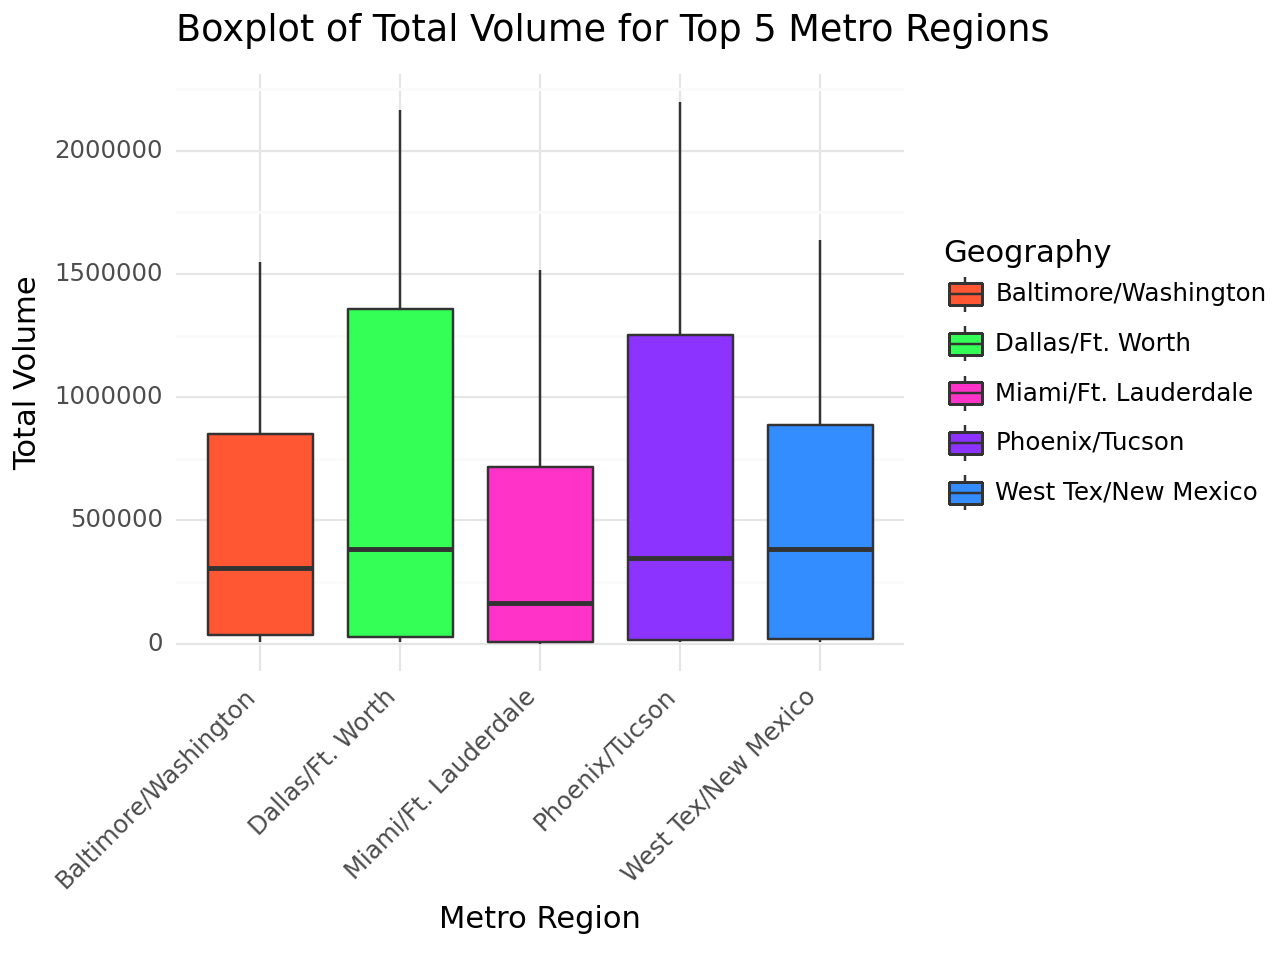

In [10]:
specific_regions = ["Baltimore/Washington", "Dallas/Ft. Worth", "West Tex/New Mexico", "Miami/Ft. Lauderdale", "Phoenix/Tucson"]
metro_data = metro_avocados[metro_avocados['Geography'].isin(specific_regions)]

# Define colors for specific regions
colors = ["#FF5733", "#33FF57", "#338DFF", "#FF33C7", "#8D33FF"]

#Plot
boxplot = (
    ggplot(metro_data, aes(x='Geography', y='TotalVolume', fill='Geography')) +
    geom_boxplot() +
    labs(x='Metro Region', y='Total Volume') +
    scale_fill_manual(values=dict(zip(specific_regions, colors))) +
    ggtitle('Boxplot of Total Volume for Top 5 Metro Regions') +
    theme_minimal()
)

boxplot += theme(axis_text_x=element_text(angle=45, hjust=1))

print(boxplot)

### 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [11]:
#Identify a variable for the CA regions
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]

# Create a subset of the data for California regions only
california_avocados = clean_avocados[clean_avocados['Geography'].isin(california_regions)].copy()
selected_columns = ['AveragePrice', 'Geography', 'Type', 'Year']

# Create a new DataFrame with only the selected columns
avocado_california = california_avocados[selected_columns].copy()

avocado_california

AveragePrice      Geography          Type  Year
44             0.85    Los Angeles  conventional  2015
45             1.25    Los Angeles       organic  2015
80             1.05     Sacramento  conventional  2015
81             1.33     Sacramento       organic  2015
82             0.94      San Diego  conventional  2015
...             ...            ...           ...   ...
33018          1.43     Sacramento       organic  2020
33019          1.12      San Diego  conventional  2020
33020          1.95      San Diego       organic  2020
33021          1.50  San Francisco  conventional  2020
33022          1.87  San Francisco       organic  2020

[2448 rows x 4 columns]

### 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

After filtering down to just those four geographies, I calculated the average price of conventional and organic avocados for each of the CA cities. Then, I added a 'difference' column that was the difference between average organic and conventional avocado prices for each of the four cities. Once I had the differences, I created a barchart to make it easier to compare the cities and who had the greatest difference in prices between the two, and it looks like SF had the highest.

In [12]:
#Creating rows that combine conventional and organic prices for the same city in the same year
avocado_type = avocado_california.pivot_table(index = "Geography",
                                             columns = "Type", values = "AveragePrice")
                                              
avocado_type.reset_index()

Type      Geography  conventional   organic
0       Los Angeles      1.047124  1.574902
1        Sacramento      1.295359  1.873856
2         San Diego      1.113856  1.798366
3     San Francisco      1.400490  2.119444

In [13]:
#Adding difference column (Organic - Conventional)
avocado_type['difference'] = (avocado_type['organic'] - avocado_type['conventional'])
avocado_type.reset_index(inplace = True)

avocado_type

Type      Geography  conventional   organic  difference
0       Los Angeles      1.047124  1.574902    0.527778
1        Sacramento      1.295359  1.873856    0.578497
2         San Diego      1.113856  1.798366    0.684510
3     San Francisco      1.400490  2.119444    0.718954

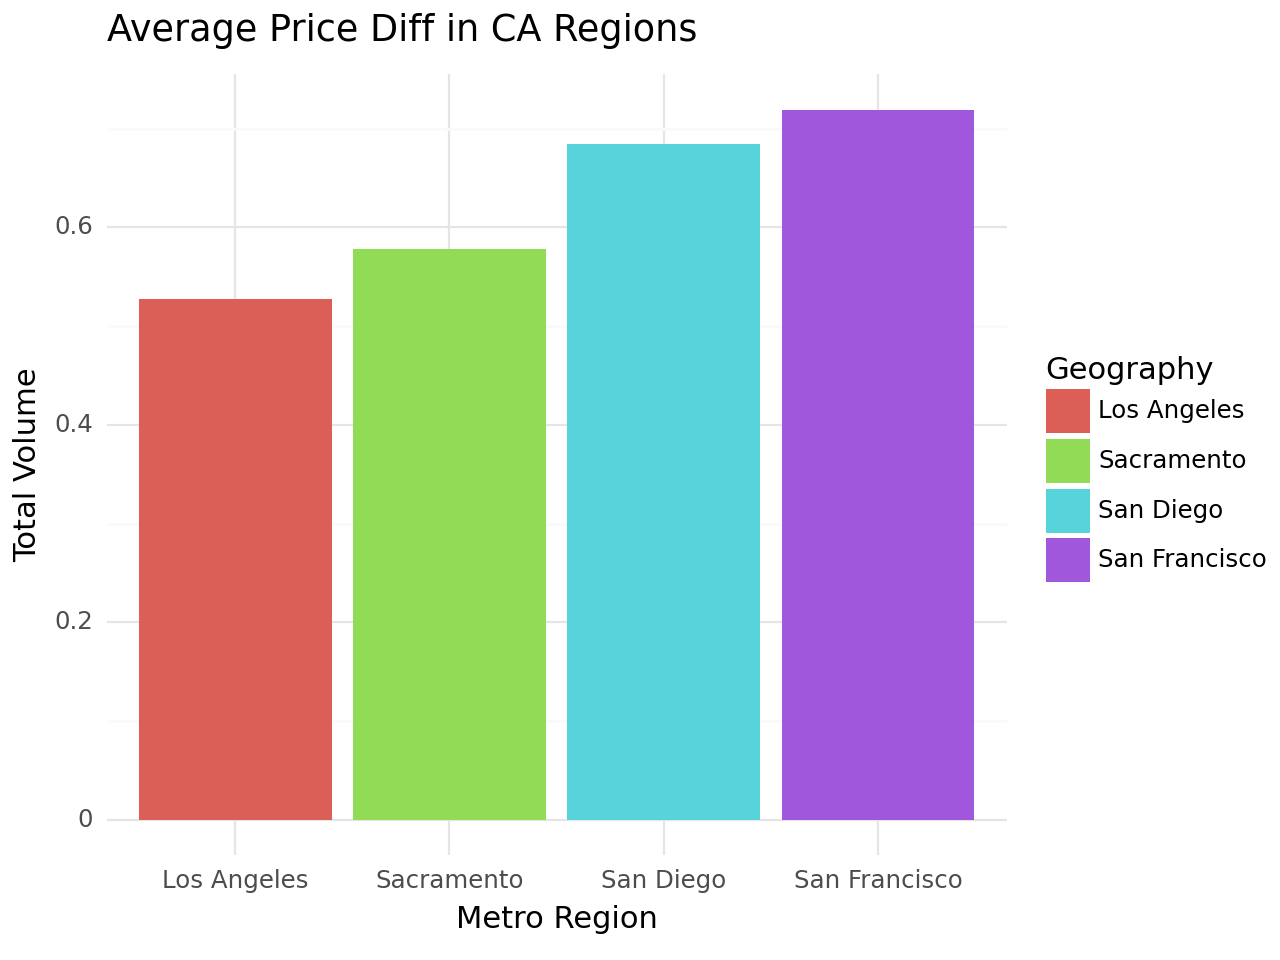

In [14]:
# Create a ggplot object with geom_bar
barplot = (
    ggplot(avocado_type, aes(x='Geography', y='difference', fill='Geography')) +
    geom_bar(stat = 'identity') +
    labs(x='Metro Region', y='Total Volume') +
    ggtitle('Average Price Diff in CA Regions') +
    theme_minimal()
)

print(barplot)

### 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

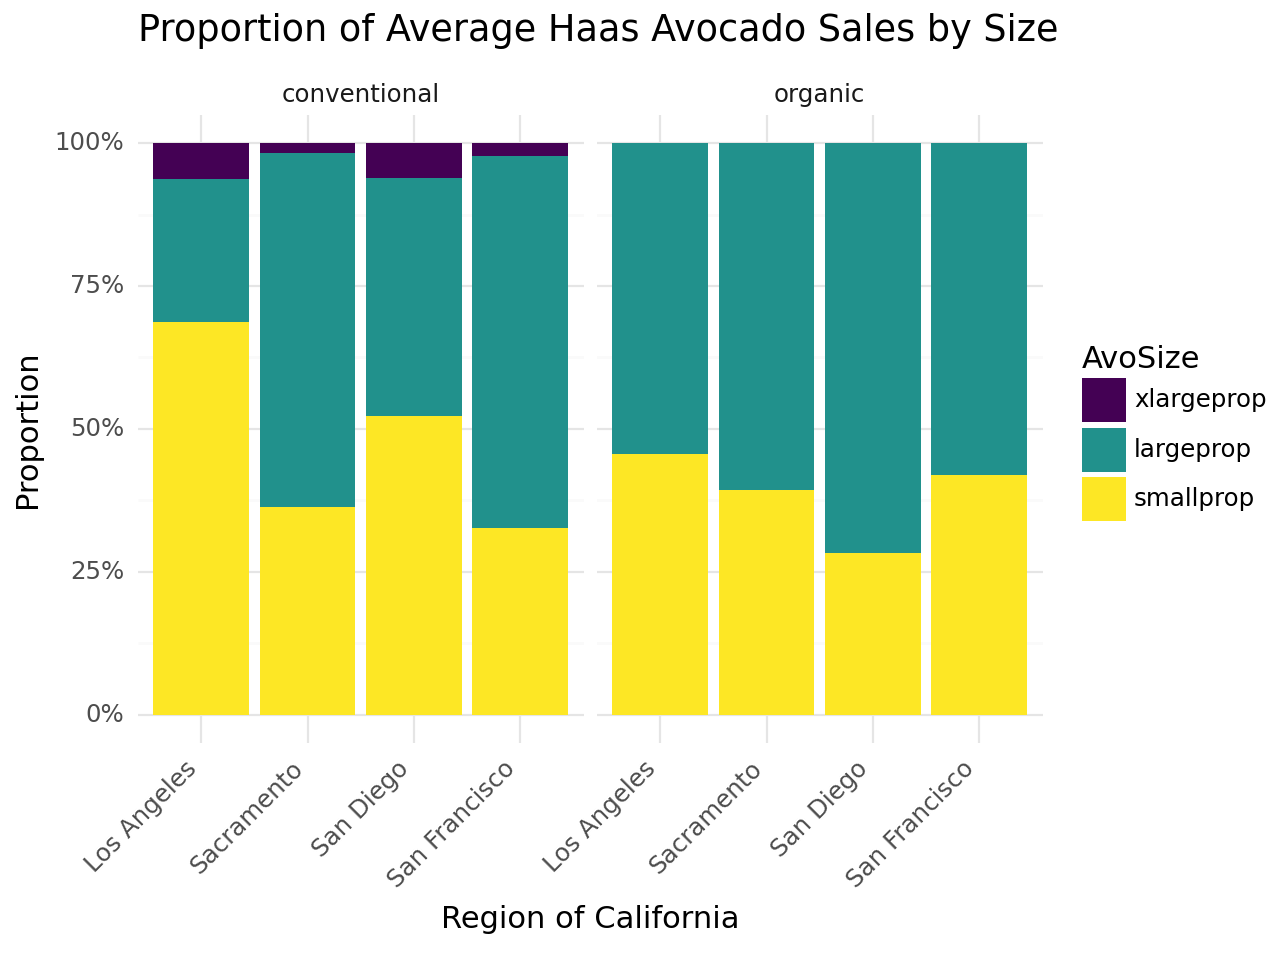

In [15]:
df = california_avocados.copy()
df['total'] = (df['SmallAvo'] + df['MediumAvo'] + df['LargeAvo'])
df['xlargeprop'] = (df['LargeAvo'] / df['total'])
df['largeprop'] = (df['MediumAvo'] / df['total'])
df['smallprop'] = (df['SmallAvo'] / df['total'])

grouped = df.groupby(['Geography', 'Type']).agg({
    'xlargeprop': 'mean',
    'largeprop': 'mean',
    'smallprop': 'mean',
}).reset_index()

long_format = pd.melt(grouped, id_vars=['Geography', 'Type'], 
                 value_vars=['xlargeprop', 'largeprop', 'smallprop'], 
                 var_name='AvoSize', value_name='Proportion')

long_format['AvoSize'] = pd.Categorical(long_format['AvoSize'], 
                                        categories= ['xlargeprop', 'largeprop', 'smallprop'], 
                                        ordered=True)

plot = (
    ggplot(long_format, aes(x='Geography', y='Proportion', fill='AvoSize'))
    + facet_grid(".~Type")
    + geom_col(position='stack')
    + labs(title="Proportion of Average Haas Avocado Sales by Size", x="Region of California", y="Proportion")
    + theme_minimal()
    + scale_y_continuous(labels=lambda labels: [f'{label:.0%}' for label in labels])
)

plot += theme(axis_text_x=element_text(angle=45, hjust=1))

print(plot)

## Using Outside Data

In [16]:
housing_price = pd.read_csv("C:/Users/ryanc/Desktop/GSB_544/Data/Housing_Price_Average.csv")
housing_price.head()

Geography  housing price
0    Los Angeles        1775644
1     Sacramento         471129
2      San Diego        1539145
3  San Francisco        1978296

In [17]:
combine = df.merge(housing_price, on=["Geography"])
combine

Date  AveragePrice  TotalVolume    SmallAvo  MediumAvo  LargeAvo  \
0    2015-01-04          0.85   2682159.95  1837999.65  524430.47  64225.78   
1    2015-01-04          1.25     54495.54    47721.51    1723.40      0.00   
2    2015-01-11          0.85   2713699.60  1786326.65  617233.39  58892.91   
3    2015-01-11          1.08     60232.63    52087.31    2063.44      0.00   
4    2015-01-18          0.89   2800679.50  1925013.31  526106.80  59364.23   
...         ...           ...          ...         ...        ...       ...   
2443 2020-11-15          1.78     61454.10     4727.34    5548.32      0.00   
2444 2020-11-22          1.28    778476.27   156625.29  167370.28   4767.84   
2445 2020-11-22          1.87     59882.68     3110.05    4956.81      4.17   
2446 2020-11-29          1.50    644141.37   128555.43  136718.24   5597.21   
2447 2020-11-29          1.87     59527.02     2815.23    4542.30      0.00   

      TotalBags  SmallBags  LargeBags  XLargeBags  ... state  region total_us  \
0     255504.05  215571.80   36981.72     2950.53  ...     0       0        0   
1       5050.63    5050.63       0.00        0.00  ...     0       0        0   
2     251246.65  222971.68   25111.74     3163.23  ...     0       0        0   
3       6081.88    6081.88       0.00        0.00  ...     0       0        0   
4     290195.16  260857.96   26671.18     2666.02  ...     0       0        0   
...         ...        ...        ...         ...  ...   ...     ...      ...   
2443   51178.44   51088.34      90.10        0.00  ...     0       0        0   
2444  449712.86  187499.75  257065.31     5147.80  ...     0       0        0   
2445   51811.65   51680.30     131.35        0.00  ...     0       0        0   
2446  373270.49  159276.65  207760.32     6233.52  ...     0       0        0   
2447   52169.49   52034.33     135.16        0.00  ...     0       0        0   

      metro  city       total  xlargeprop  largeprop  smallprop  housing price  
0         0     1  2426655.90    0.026467   0.216112   0.757421        1775644  
1         0     1    49444.91    0.000000   0.034855   0.965145        1775644  
2         0     1  2462452.95    0.023916   0.250658   0.725426        1775644  
3         0     1    54150.75    0.000000   0.038105   0.961895        1775644  
4         0     1  2510484.34    0.023647   0.209564   0.766790        1775644  
...     ...   ...         ...         ...        ...        ...            ...  
2443      0     1    10275.66    0.000000   0.539948   0.460052        1978296  
2444      0     1   328763.41    0.014502   0.509090   0.476407        1978296  
2445      0     1     8071.03    0.000517   0.614148   0.385335        1978296  
2446      0     1   270870.88    0.020664   0.504736   0.474600        1978296  
2447      0     1     7357.53    0.000000   0.617368   0.382632        1978296  

[2448 rows x 23 columns]

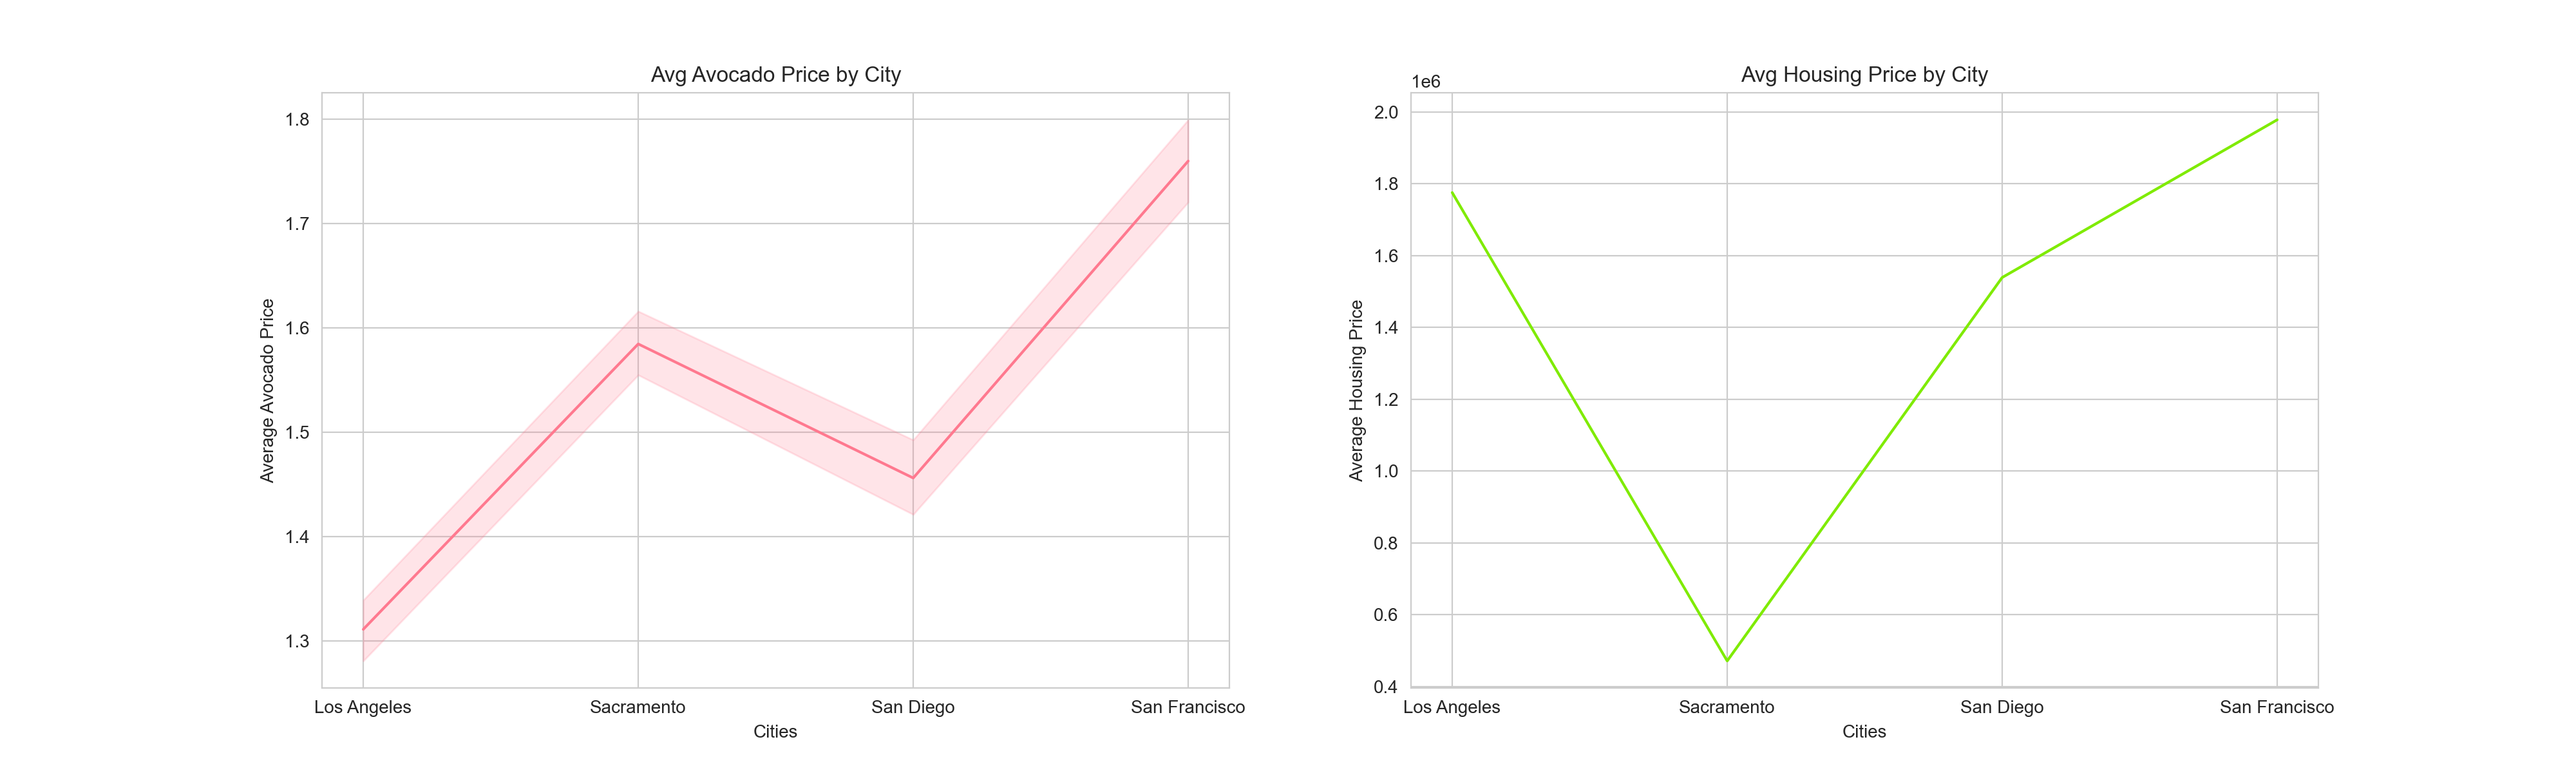

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#Set the style before creating subplots
sns.set_style("whitegrid")
#Create subplots with two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

#Plot 1 avocado average price

sns.lineplot(x="Geography", y="AveragePrice", data=combine, color="#FF798F", ax=axes[0])
axes[0].set_title("Avg Avocado Price by City")
axes[0].set_xlabel("Cities")
axes[0].set_ylabel("Average Avocado Price")

#Plot 2 housing price

sns.lineplot(x="Geography", y="housing price", data=combine, color="#7FEB00", ax=axes[1])
axes[1].set_title("Avg Housing Price by City")
axes[1].set_xlabel("Cities")
axes[1].set_ylabel("Average Housing Price")

plt.show()

### Using outside data
It doesn't look as though there is a discernible relationship between housing prices and avocado prices in these tows, other than the fact that the most expensive avocados seem to be in SF, which is also the highest home price. 